### Import libraries and file

In [1]:
import pandas as pd
import csv
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

### Load npy file

In [2]:
matrix = np.load('/mnt/files/matrix.npy')

### Result Shapes

In [3]:
matrix.shape

(95458, 1226)

### Slicing consider similar objects

In [4]:
row_idx = np.array([432,1089,1090,1091,1093,1094,2424,3089,3090,3091,3092,5830,6642,6982,8643,10511,10728,11339,11591,12077,15327,15942,16298,16299,17442,17599,17602,17603,18016,18017,18644,18908,19074,19080,19724,21018,21906,22370,22885,23131,23916,23943,23944,23945,23946,24985,26966,30848,31554,31924,31925,31928,32307,33018,33733,34687,35171,35505,35637,35895,36318,36319,38572,38574,38575,39528,40829,41162,42311,42386,42387,42389,42732,42801,43602,43603,43714,43722,43726,43730,44099,45125,45908,45909,45911,45914,45916,45918,45924,45925,45926,45929,45930,45934,46284,46285,46637,46638,47396,48436,48867,51239,51563,51564,51570,51573,51581,51592,51612,51873,52924,52925,53457,53498,54436,55666,55667,55888,56653,58175,59354,59570,60997,61816,61817,61818,61825,61829,61830,62407,63275,63662,63936,64094,64095,64096,64097,64098,64099,65213,66392,66393,66394,66395,66647,66692,67754,67756,67757,69329,69705,69889,70081,70082,70142,70146,70298,70299,70300,70311,70633,71308,73162,73819,74849,76402,76403,76483,76893,78032,78914,79360,79361,79634,80537,81623,81924,81925,81926,81927,81928,82195,82249,82317,82318,82666,82668,84292,86397,87029,87876,87877,88731,88732,88756,89098,89872,89904,89905,91526,94935])

In [5]:
matrix_sliced = matrix[row_idx, :]

In [6]:
matrix_sliced.shape

(201, 1226)

In [7]:
upper_sm_sliced = pdist(matrix_sliced, 'cosine')

In [8]:
upper_sm_sliced.shape

(20100,)

In [9]:
sm_sliced = np.float32(squareform(upper_sm_sliced))

### Trick to allow make huge numbers of recursion ( if needed)

In [10]:
import sys
sys.setrecursionlimit(100000)

### Hierarchy Cluster using sliced values

In [11]:
hc_sliced_complete = linkage(upper_sm_sliced, method='complete')

In [12]:
hc_sliced_single = linkage(upper_sm_sliced, method='single')

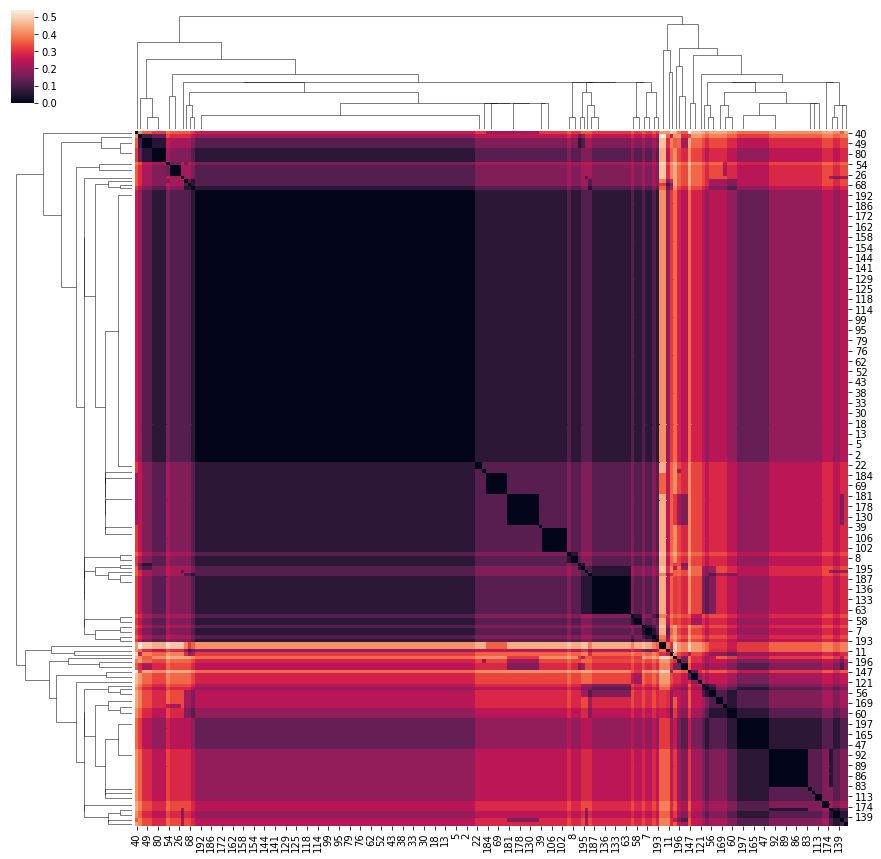

In [31]:
#plt.figure(figsize=(15,8))
clustermap_sliced_complete = sns.clustermap(sm_sliced, row_linkage=hc_sliced_complete, col_linkage=hc_sliced_complete, figsize=(15, 15))

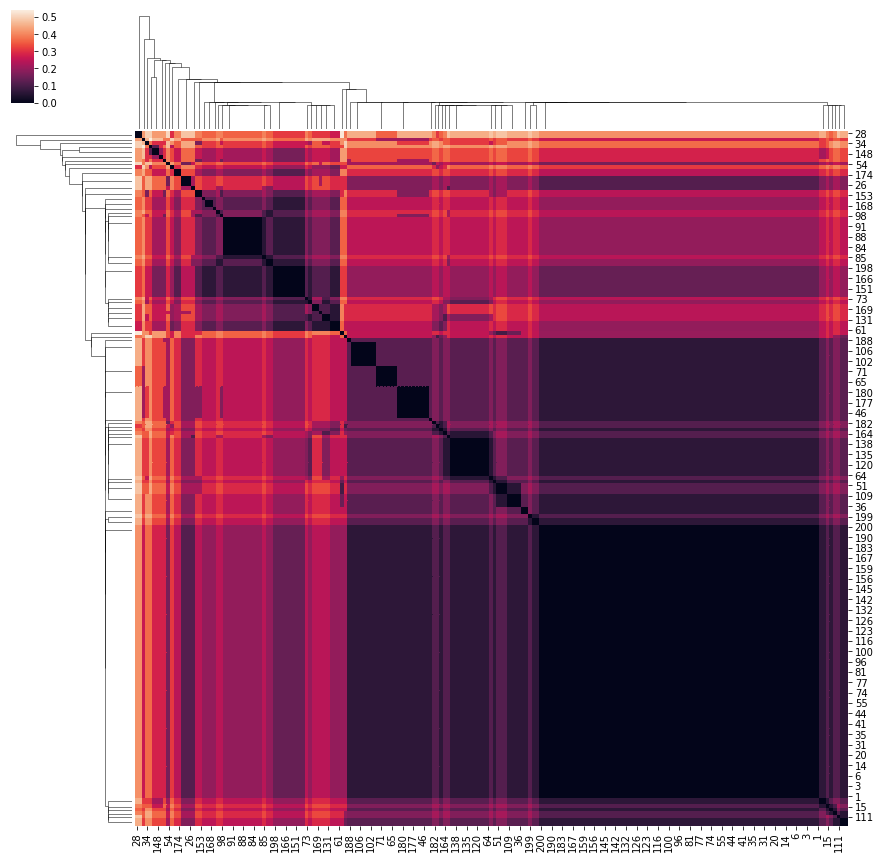

In [32]:
clustermap_sliced_single = sns.clustermap(sm_sliced, row_linkage=hc_sliced_single, col_linkage=hc_sliced_single, figsize=(15,15))

In [15]:
#clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True)

In [16]:
#clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, z_score=0)

In [17]:
#clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True, z_score=0)

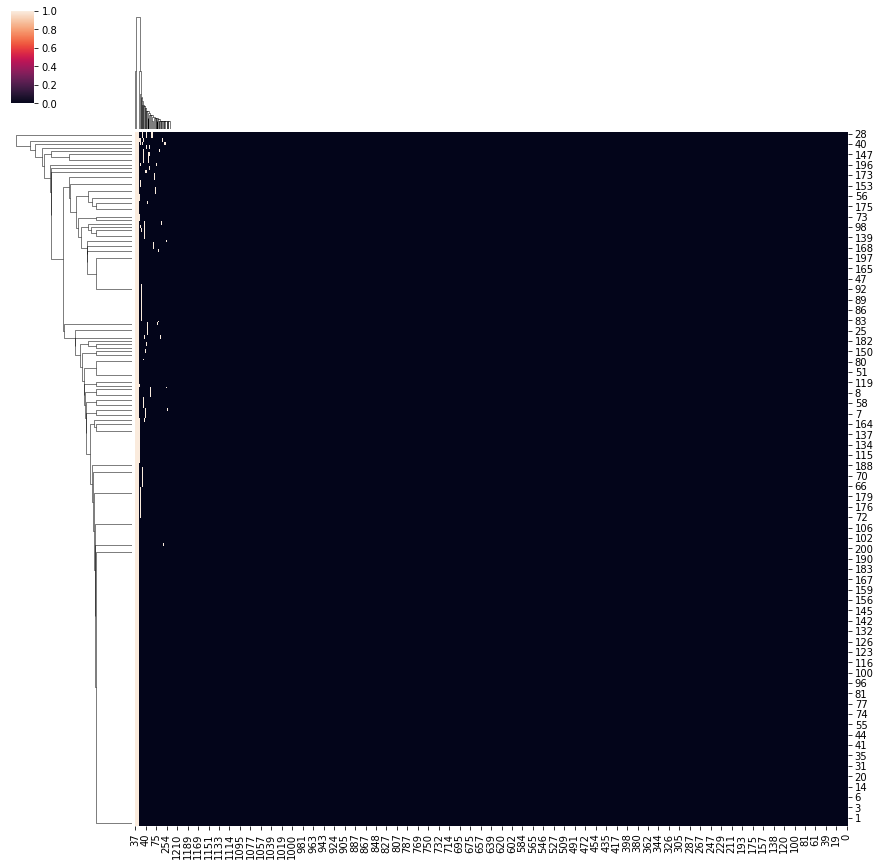

In [43]:
#plt.figure(figsize=(100,50))
appsxperm = sns.clustermap(matrix_sliced, figsize=(15,15))

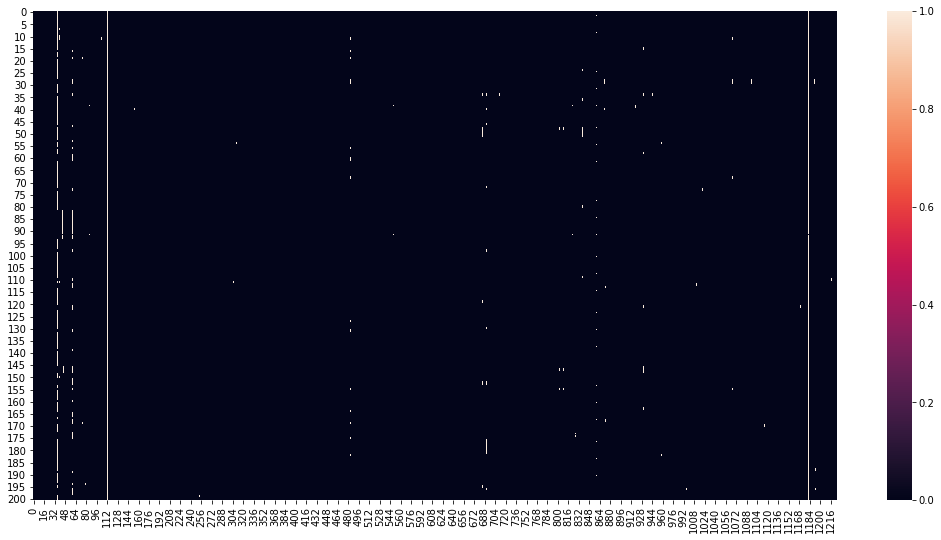

In [45]:
plt.figure(figsize=(18,9))
#plt.subplots(figsize=(15,8))
heatmap_test = sns.heatmap(matrix_sliced)